[View in Colaboratory](https://colab.research.google.com/github/Ayobami-00/AI-SATURDAYS-GROUP-5-PROJECT/blob/master/AI_SATURDAYS_GROUP_5_PROJECT--.ipynb)

# Group Project

This notebook along with the [TensorFlow and deep learning, without a PhD](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0) codelabs should serve as a starter guide for your group projects. For the project, you are to build a model that achieves a minimum of 96% accuracy for a classification task on the MNIST dataset. This can be achieved by several methods, but you are required to follow some certain steps as outlined below:

1. Load the mnist dataset from tensorflow. This consists of the train, validation, and test sets.
    The train set has 55000 examples,
    The validation set has 5000 examples, and
    the test set has 10000 examples.
    
2. Visualize the examples in each set.
 
3. Build a softmax regression model (a 1 layer neural network)and train it on the dataset.

4. Add a hidden layer of 200 neurons, use sigmoid activation for hidden units, train and obtain train, validation and test accuracies and loss

5. Build a five layers neural network with sigmoid activation

6. Replace the sigmoid activations with relu

7. Introduce learning rate decay

8. Use dropout

9. Convolutional Neural Networks


In [62]:
#@title All imports and Initializations(RUN THIS CELL!) { display-mode: "code" }
'''
Obtain MNIST dataset using tensorflow
'''



import tensorflow as tf
import math
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('data/fashion',source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',one_hot=True)




fashion_class = {0:'shirt/top',
                1: 	'Trouser',
                2: 	'Pullover',
                3: 	'Dress',
                4: 	'Coat',
                5: 	'Sandal',
                6: 	'Shirt',
                7: 	'Sneaker',
                8: 	'Bag',
                9: 	'Ankle boot'
                }

def view_image(x,y):
  '''
  View 10 random images from a dataset
  
  input:
    x => ndarray[of shape (m x n)] (examples)
    y => ndarray[of shape (m x c)] (onehot encoded)
          m = no of examples
          c = no of classes
  output:
    None.
   
  '''
  f, axarr = plt.subplots(2,5)
  
  for ax in f.axes:
    i = np.random.randint(x.shape[0]) # pick a random example (ith example)
    ax.get_xaxis().set_ticks([]) # don't label the xaxis
    ax.get_yaxis().set_ticks([]) # don't label the yais
    ax.text(0,0, fashion_class[np.argmax(y[i])]) # display a text containing the ith example's class
    ax.imshow(x[i].reshape(28,28)) # display the ith example

    
    
# This function does the training

def training(X_train, y_train, X_val, y_val, sess, epochs = 1, mini_batch = 100, step=None, pkeep=None):
  
    '''
    **arguments**
    X_train:
      The input feature matrix
    y_train:
      The output true label
    X_val:
      The validation set feature matrix
    y_val:
      The validation set true label
    sess:
      A tensorflow session to run the computational graph
    epochs:
      No of times to run through the entire examples 
    mini_batch:
      No of examples to use in each train step
      
      
    **returns**
    history: tuple
      a tuple containing the train and validation accuracies and losses
      
    '''
    
    accuracies = []
    loss = []
    accuracies_validation = []
    loss_validation = []
    
    steps_per_epoch = int(X_train.shape[0]/mini_batch)
    training_steps = epochs * steps_per_epoch
  
    for i in range(1,training_steps+1):
      # pick a mini batch from the training
      s = i%steps_per_epoch
      batch_X, batch_Y = X_train[(s-1)*mini_batch:(s)*mini_batch], y_train[(s-1)*mini_batch:(s)*mini_batch]

      # compute train/validation loss and accuracy
      if i%steps_per_epoch == 0:
          # train
          if(step != None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train})
          if(step == None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train, pkeep_val: pkeep})
          if(step != None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train, pkeep_val: pkeep})
          if(step == None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_train, y: y_train})
          loss.append(c)
          accuracies.append(a)
          print("EPOCH " + str(i/steps_per_epoch) + "\n" + " train accuracy:" + str(a) + "train loss: " + str(c))
          
          # validation
          if(step != None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val})
          if(step == None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val, pkeep_val: 1})
          if(step != None and pkeep != None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val, pkeep_val: 1})
          if(step == None and pkeep == None):
            a, c = sess.run([accuracy, cross_entropy], feed_dict={X: X_val, y: y_val})
         
          loss_validation.append(c)
          accuracies_validation.append(a)
          print(" ********* validation accuracy:" + str(a) + " validation loss: " + str(c))

      # the backpropagation training step
     
      if(step != None and pkeep == None):
        sess.run(train_step, feed_dict={X: batch_X, y: batch_Y, step_val: i})
      if(step == None and pkeep != None):
        sess.run(train_step, feed_dict={X: batch_X, y: batch_Y, pkeep_val: pkeep})
      if(step != None and pkeep != None):
        sess.run([train_step], feed_dict={X: X_val, y: y_val, step_val: i, pkeep_val: pkeep})
      if(step == None and pkeep == None):
        sess.run(train_step, feed_dict={X: X_val, y: y_val})
         
      
      history = (accuracies, loss, accuracies_validation, loss_validation)
      
    return history
  


def plot_history(history):
  accuracies, loss, accuracies_validation, loss_validation = history
  f, ax = plt.subplots(2,2)
  ax[0,0].plot(accuracies)
  ax[0,0].set(xlabel='epochs', ylabel='train_accuracy')

  ax[0,1].plot(loss )
  ax[0,1].set(xlabel='epochs', ylabel='train_loss')

  ax[1,0].plot(accuracies_validation)
  ax[1,0].set(xlabel='epochs', ylabel='val_accuracy')


  ax[1,1].plot(loss_validation)
  ax[1,1].set(xlabel='epochs', ylabel='val_loss')
  

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


## 1. Load the dataset
for the train set, x_train contains the 55000 train images and y_train contains the onehot encoded label. Same applies to the validation and test set


In [0]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_val = mnist.validation.images
y_val = mnist.validation.labels
x_test = mnist.test.images
y_test = mnist.test.labels

The train images are 28x28 gray scale images. But the loaded images are flattened to be of size (1x784). Hence the size of the train set images is 55000 by 784. this means that there are 55000 examples of size (28*28=784). The same applies to the validation and test set

In [64]:
print('shape of train set is: {0}, this means that it has {1} examples'.format(x_train.shape, x_train.shape[0]))
print('shape of validation set is: {0}, this means that it has {1} examples'.format(x_val.shape, x_val.shape[0]))
print('shape of test set is: {0}, this means that it has {1} examples'.format(x_test.shape, x_test.shape[0]))

shape of train set is: (55000, 784), this means that it has 55000 examples
shape of validation set is: (5000, 784), this means that it has 5000 examples
shape of test set is: (10000, 784), this means that it has 10000 examples


## 2. Visualize examples in each set

View 10 random examples from train, validation and test set


View 10 random images from the train set

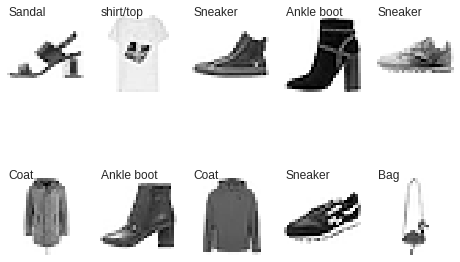

In [65]:
view_image(x_train, y_train)

View 10 random images from the validation set

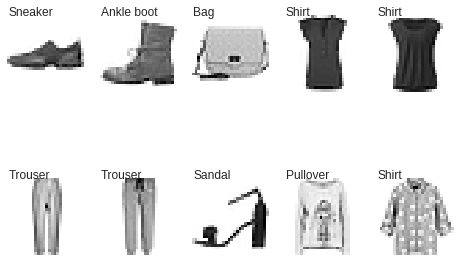

In [66]:
view_image(x_val, y_val)

View 10 random images from the test set

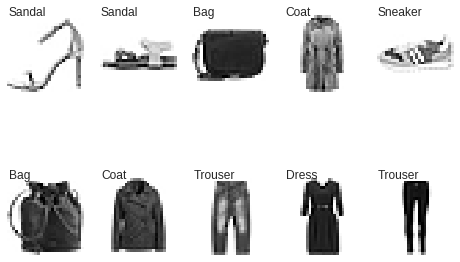

In [67]:
view_image(x_test, y_test)

## 3. Build a softmax regression model (a 1 layer neural network)and train it on the dataset.


Build Computational Graph

In [0]:
# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# weights
W = tf.Variable(tf.zeros([784, 10]))
# biases
b = tf.Variable(tf.zeros([10]))

# weigthed sum
z = tf.matmul(X, W) + b

# softmax activation
h = tf.nn.softmax(z)

# softmax cross entropy loss
cross_entropy = -tf.reduce_mean(y * tf.log(h))

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training, learning rate = 0.005
# learning rate
lr = 0.005
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)


Start the session

In [0]:
# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train for 100 epochs

In [37]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=1000)

EPOCH 1.0
 train accuracy:0.62756366train loss: 0.1831179
 ********* validation accuracy:0.6408 validation loss: 0.182067
EPOCH 2.0
 train accuracy:0.6529818train loss: 0.15653014
 ********* validation accuracy:0.665 validation loss: 0.15495725
EPOCH 3.0
 train accuracy:0.6616909train loss: 0.13951589
 ********* validation accuracy:0.6718 validation loss: 0.13768423
EPOCH 4.0
 train accuracy:0.66654545train loss: 0.12784451
 ********* validation accuracy:0.6746 validation loss: 0.12586218
EPOCH 5.0
 train accuracy:0.66965455train loss: 0.11936973
 ********* validation accuracy:0.6796 validation loss: 0.11728464
EPOCH 6.0
 train accuracy:0.67398185train loss: 0.112931944
 ********* validation accuracy:0.6836 validation loss: 0.1107678
EPOCH 7.0
 train accuracy:0.67925453train loss: 0.10786297
 ********* validation accuracy:0.69 validation loss: 0.105632745
EPOCH 8.0
 train accuracy:0.68405455train loss: 0.103754856
 ********* validation accuracy:0.6972 validation loss: 0.101466425
EPOCH

plot the train and validation acurracy and loss against the number of epochs

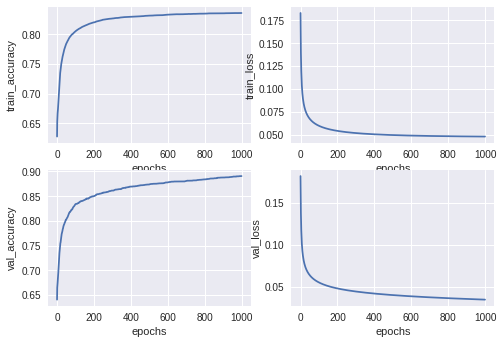

In [38]:
plot_history(history)

Obtain the test accuracy

In [39]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  82.23%


In [0]:
sess.close()

You can try increasing the number of epochs for better accuracy

## 4. Add a hidden layer of 200 neurons, use sigmoid activation for hidden units, train and obtain train, validation and test accuracies and loss

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = tf.nn.sigmoid(z1)


''' Second/output Layer'''
# weights 2
W2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
# biases 2
b2 = tf.Variable(tf.zeros([10]))

# weigthed sum
z2 = tf.matmul(h1, W2) + b2

# softmax activation
h2 = tf.nn.softmax(z2)

# softmax cross entropy loss
cross_entropy = -tf.reduce_mean(y * tf.log(h2))

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h2, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training, learning rate = 0.005
# learning rate
lr = 0.005
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

Start session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [45]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=1000)

EPOCH 1.0
 train accuracy:0.16296364train loss: 0.2308622
 ********* validation accuracy:0.1678 validation loss: 0.23015027
EPOCH 2.0
 train accuracy:0.21512727train loss: 0.22128062
 ********* validation accuracy:0.226 validation loss: 0.22048883
EPOCH 3.0
 train accuracy:0.33136365train loss: 0.2136623
 ********* validation accuracy:0.3478 validation loss: 0.21272269
EPOCH 4.0
 train accuracy:0.41776365train loss: 0.20657828
 ********* validation accuracy:0.4302 validation loss: 0.20549536
EPOCH 5.0
 train accuracy:0.47383636train loss: 0.19991912
 ********* validation accuracy:0.4876 validation loss: 0.19870616
EPOCH 6.0
 train accuracy:0.51492727train loss: 0.1936418
 ********* validation accuracy:0.5266 validation loss: 0.19231202
EPOCH 7.0
 train accuracy:0.54565454train loss: 0.1877159
 ********* validation accuracy:0.5578 validation loss: 0.18628137
EPOCH 8.0
 train accuracy:0.56996363train loss: 0.1821182
 ********* validation accuracy:0.5794 validation loss: 0.18059006
EPOCH 

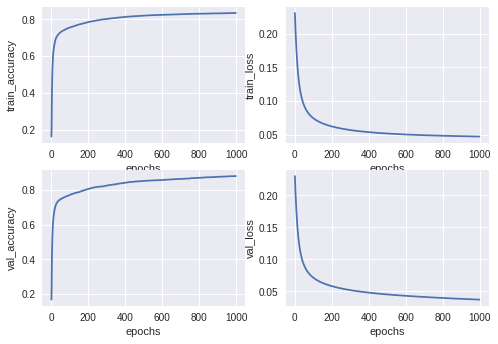

In [46]:
plot_history(history)

In [47]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  82.32%


In [0]:
sess.close()

You can try increasing the number of epochs for better accuracy

# You are to build the computational graph by completing the required code statement with None assigned

## 5. Build a five layer neural network with sigmoid activation

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = tf.nn.sigmoid(z1)

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 2
W2 = tf.Variable(tf.truncated_normal([200,100] , stddev = 0.1))
# biases 2
b2 = tf.Variable(tf.zeros([100]))

# weigthed sum
z2 = tf.matmul(h1, W2) + b2

#  activation
h2 = tf.nn.sigmoid(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 3
W3 = tf.Variable(tf.truncated_normal([100,60] , stddev = 0.1))
# biases 3
b3 = tf.Variable(tf.zeros([60]))

# weigthed sum
z3 = tf.matmul(h2,W3) + b3
#  activation
h3 = tf.nn.sigmoid(z3)

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 4
W4 = tf.Variable(tf.truncated_normal([60,30] , stddev = 0.1))
# biases 4
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = tf.matmul(h3,W4) + b4


#  activation
h4 = tf.nn.sigmoid(z4)

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 5
W5 = tf.Variable(tf.truncated_normal([30,10] , stddev = 0.1))
# biases 5
b5 = tf.Variable(tf.zeros([10]))
# weigthed sum
z5 = tf.matmul(h4,W5) + b5

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################



# cross-entropy loss function (= -sum(y_i * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# learning rate
lr =0.0001
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

################# END ###############################

Start a session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [0]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=5000)

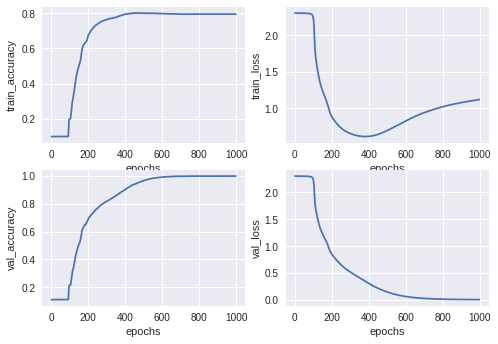

In [59]:
plot_history(history)

Test accuracy

In [60]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  79.15%


## 6. Replace the sigmoid activations with relu

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])

''' First hidden layer with 200 neurons'''
################## START CODE #########################
# weights 1
W1 = tf.Variable(tf.truncated_normal([784,200] , stddev = 0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X,W1) + b1

#  activation
h1 = tf.nn.relu(z1)
####################### END #############################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 2
W2 = tf.Variable(tf.truncated_normal([200,100] , stddev = 0.1))
# biases 2
b2 = tf.Variable(tf.zeros([100]))

# weigthed sum
z2 = tf.matmul(h1,W2) + b2

# activation
h2 = tf.nn.relu(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 3
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 3
b3 =tf.Variable(tf.zeros([60]))

# weigthed sum
z3 = tf.matmul(h2, W3) + b3

# activation
h3 = tf.nn.relu(z3)

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 4
W4 = tf.Variable(tf.truncated_normal([60,30] , stddev = 0.1))
# biases 4
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = tf.matmul(h3,W4) + b4

# activation 
h4 = tf.nn.relu(z4)

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 5
W5 = tf.Variable(tf.truncated_normal([30,10] , stddev = 0.1))
# biases 5
b5 = tf.Variable(tf.zeros([10]))
# weigthed sum
z5 = tf.matmul(h4,W5) + b5

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################



# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# learning rate
lr = 0.03
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

################# END ###############################

Start a session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [58]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100)

EPOCH 1.0
 train accuracy:0.7494182train loss: 0.6707039
 ********* validation accuracy:0.7704 validation loss: 0.62567663
EPOCH 2.0
 train accuracy:0.81332725train loss: 0.53937536
 ********* validation accuracy:0.8546 validation loss: 0.43704987
EPOCH 3.0
 train accuracy:0.8243818train loss: 0.50552756
 ********* validation accuracy:0.8788 validation loss: 0.35001415
EPOCH 4.0
 train accuracy:0.82774544train loss: 0.5208271
 ********* validation accuracy:0.8922 validation loss: 0.31018692
EPOCH 5.0
 train accuracy:0.8300909train loss: 0.49885952
 ********* validation accuracy:0.8986 validation loss: 0.3462658
EPOCH 6.0
 train accuracy:0.8266364train loss: 0.57544696
 ********* validation accuracy:0.9186 validation loss: 0.2342856
EPOCH 7.0
 train accuracy:0.823train loss: 0.5855682
 ********* validation accuracy:0.9364 validation loss: 0.18999505
EPOCH 8.0
 train accuracy:0.79963636train loss: 0.81175524
 ********* validation accuracy:0.8902 validation loss: 0.3395183
EPOCH 9.0
 trai

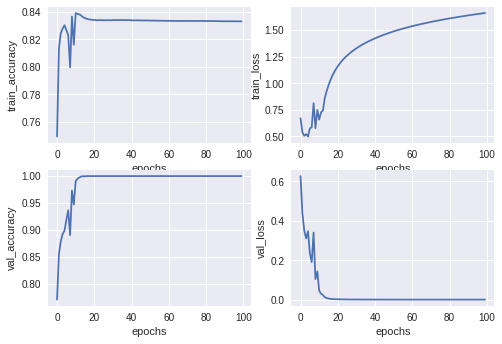

In [59]:
plot_history(history)

Test Accuracy

In [60]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  82.17%


## 7. Introduce learning rate decay

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# step for variable learning rate
step_val = tf.placeholder(tf.int32)

''' First hidden layer with 200 neurons'''
####################### START CODE #############################
# weights 1
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X,W1) + b1

#  activation
h1 = tf.nn.relu(z1)
####################### END #############################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 2
W2 = tf.Variable(tf.truncated_normal([200,100] , stddev = 0.1))
# biases 2
b2 = tf.Variable(tf.zeros([100]))

# weigthed sum
z2 = tf.matmul(h1,W2) + b2
# activation
h2 = tf.nn.relu(z2)

####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 3
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 3
b3 = tf.Variable(tf.zeros([60]))

# weigthed sum
z3 = tf.matmul(h2,W3) + b3

# activation
h3 = tf.nn.relu(z3)

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 4
W4 = tf.Variable(tf.truncated_normal([60,30] , stddev = 0.1))
# biases 4
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = tf.matmul(h3,W4) + b4

# activation 
h4 = tf.nn.relu(z4)

#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 5
W5 = (tf.truncated_normal([30,10] , stddev = 0.1))
# biases 5
b5 = tf.Variable(tf.zeros([10]))
# weigthed sum
z5 = tf.matmul(h4,W5) + b5

# softmax activation (optional)
h5 = tf.nn.softmax(z5)

#################### END ##################################




# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, step_val, 2000, 1/math.e)
train_step = train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

################# END ###############################

Start Session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [68]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100, step=True)

EPOCH 1.0
 train accuracy:0.06798182train loss: 2.3036492
 ********* validation accuracy:0.1018 validation loss: 2.2997873
EPOCH 2.0
 train accuracy:0.08038182train loss: 2.2962697
 ********* validation accuracy:0.1114 validation loss: 2.3080132
EPOCH 3.0
 train accuracy:0.09147273train loss: 2.3078847
 ********* validation accuracy:0.1376 validation loss: 2.2999198
EPOCH 4.0
 train accuracy:0.15829091train loss: 2.30044
 ********* validation accuracy:0.0704 validation loss: 2.3104808
EPOCH 5.0
 train accuracy:0.10943636train loss: 2.2965465
 ********* validation accuracy:0.0882 validation loss: 2.2984378
EPOCH 6.0
 train accuracy:0.1369091train loss: 2.3002012
 ********* validation accuracy:0.13 validation loss: 2.2992716
EPOCH 7.0
 train accuracy:0.07532727train loss: 2.3054848
 ********* validation accuracy:0.0992 validation loss: 2.3039465
EPOCH 8.0
 train accuracy:0.046454545train loss: 2.3040192
 ********* validation accuracy:0.0712 validation loss: 2.305582
EPOCH 9.0
 train accu

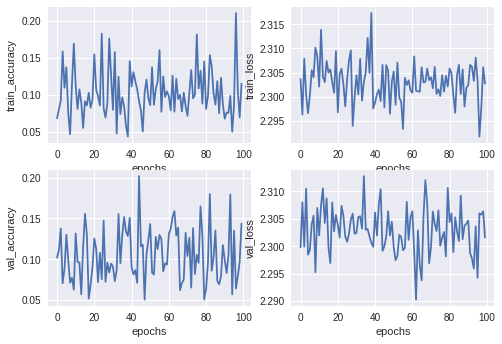

In [69]:
plot_history(history)

Test Accuracy

In [70]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  4.00%


In [0]:
sess.close()

## 8. Use dropout

Computational graph

In [0]:
#Create computational graph

# input 
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])
# step for variable learning rate
step_val = tf.placeholder(tf.int32)

# variable learning rate
lr = tf.placeholder(tf.float32)
# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep_val = tf.placeholder(tf.float32)


''' First hidden layer with 200 neurons'''
################## START CODE #########################
# weights 1
W1 = tf.Variable(tf.truncated_normal([784,200] , stddev = 0.1))
# biases 1
b1 = tf.Variable(tf.zeros([200]))

# weigthed sum
z1 = tf.matmul(X, W1) + b1

#  activation
h1 = tf.nn.relu(z1)

# dropout
h1d = tf.nn.dropout(h1, pkeep_val)
################## END #########################

''' Second hidden layer with 100 neurons'''
################## START CODE #########################
# weights 1
W2 = tf.Variable(tf.truncated_normal([200,100] , stddev = 0.1))
# biases 1
b2 = tf.Variable(tf.zeros([100]))

# weigthed sum
z2 = tf.matmul(h1d, W2) + b2

# activation
h2 = tf.nn.relu(z2)

# dropout
h2d = tf.nn.dropout(h2, pkeep_val)


####################### END #############################

''' third Layer with 60 neurons'''
##################### START CODE #########################
# weights 2
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
# biases 2
b3 = tf.Variable(tf.zeros([60]))

# weigthed sum
z3 = tf.matmul(h2d, W3) + b3

# activation
h3 = tf.nn.relu(z3)

# dropout
h3d = tf.nn.dropout(h3, pkeep_val)

#################### END ##################################

''' fourth Layer with 30 neurons'''
##################### START CODE #########################
# weights 2
W4 = tf.Variable(tf.truncated_normal([60,30] , stddev = 0.1))
# biases 2
b4 = tf.Variable(tf.zeros([30]))

# weigthed sum
z4 = tf.matmul(h3,W4) + b4

# activation 
h4 = tf.nn.relu(z4)

# dropout
h4d = tf.nn.dropout(h4, pkeep_val)



#################### END ##################################

''' fifth/output Layer with 10 neurons'''
##################### START CODE #########################
# weights 2
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))#None
# biases 2
b5 = tf.Variable(tf.zeros([10]))
# weigthed sum
z5 = tf.matmul(h4,W5) + b5

# softmax activation
h5 = tf.nn.softmax(z5)

#################### END ##################################





# cross-entropy loss function (= -sum(yi * log(hi)) )
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=z5, labels=y)
cross_entropy = tf.reduce_mean(cross_entropy)

################### END ###############################

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(h5, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
################# START CODE ########################
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, step_val, 2000, 1/math.e)
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)


################# END ###############################

Start session

In [0]:
#Start session

# initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Train & visualize train/val loss and accuracy

In [63]:
history = training(x_train, y_train, x_val, y_val, sess, epochs=100, step=True, pkeep=0.75)

EPOCH 1.0
 train accuracy:0.2829818train loss: 2.169266
 ********* validation accuracy:0.3622 validation loss: 2.1281605
EPOCH 2.0
 train accuracy:0.34065455train loss: 1.8483298
 ********* validation accuracy:0.3784 validation loss: 1.7559842
EPOCH 3.0
 train accuracy:0.39905456train loss: 1.5640172
 ********* validation accuracy:0.4676 validation loss: 1.4468949
EPOCH 4.0
 train accuracy:0.44910908train loss: 1.4195824
 ********* validation accuracy:0.5388 validation loss: 1.2884215
EPOCH 5.0
 train accuracy:0.4749091train loss: 1.3396031
 ********* validation accuracy:0.5688 validation loss: 1.1986016
EPOCH 6.0
 train accuracy:0.49185455train loss: 1.2885642
 ********* validation accuracy:0.5828 validation loss: 1.1425307
EPOCH 7.0
 train accuracy:0.50652725train loss: 1.2495712
 ********* validation accuracy:0.5938 validation loss: 1.1046357
EPOCH 8.0
 train accuracy:0.5124364train loss: 1.2266889
 ********* validation accuracy:0.5998 validation loss: 1.0777662
EPOCH 9.0
 train acc

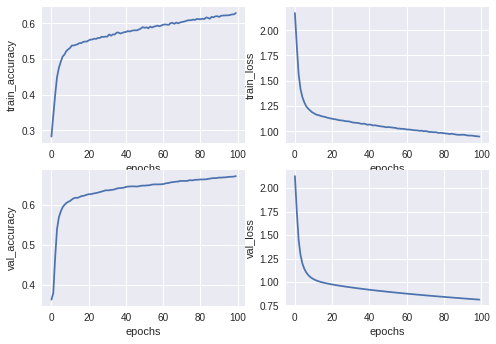

In [64]:
plot_history(history)

Test Accuracy

In [65]:
a_test, c_test  = sess.run([accuracy, cross_entropy], feed_dict={X: x_test, y: y_test, pkeep_val: 1})

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  64.85%


## 9. Convolutional Neural Networks

In [3]:
''' Let Your Imagination Run Wild '''

import tensorflow as tf
import tensorflowvisu
import math

# Building our Convolutionary Neural Network
# input
X = tf.placeholder(tf.float32, [None,784])
# labels (onehot encoded)
y = tf.placeholder(tf.float32, [None, 10])


# three convolutional layers with their channel counts, and a
# fully connected layer (tha last layer has 10 softmax neurons)
K = 4  # first convolutional layer output depth
L = 8  # second convolutional layer output depth
M = 12  # third convolutional layer
N = 200  # fully connected layer

W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.ones([K])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M])/10)

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

# The model
stride = 1  # output is 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
stride = 2  # output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2  # output is 7x7
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# matplotlib visualisation
allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)
I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)
It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)
datavis = tensorflowvisu.MnistDataVis()

# training step, the learning rate is a placeholder
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b, l = sess.run([accuracy, cross_entropy, I, allweights, allbiases,lr],
                                  feed_dict={X: batch_X, Y_: batch_Y, step: i})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(l) + ")")
        datavis.append_training_curves_data(i, a, c)
        datavis.update_image1(im)
        datavis.append_data_histograms(i, w, b)

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It],
                            feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, step: i})



ValueError: ignored

In [0]:

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [0]:
datavis.animate(training_step, 10001, train_data_update_freq=10, test_data_update_freq=100)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
# for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

print("max test accuracy: " + str(datavis.get_max_test_accuracy()))